#### References
* Kaggle page to download MNIST data - https://www.kaggle.com/c/digit-recognizer
* Christopher Olah's Blog MNIST Visualization - http://colah.github.io/posts/2014-10-Visualizing-MNIST/

## Principal Component Analysis - MNIST

In [23]:
## Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
## Read the input csv file
data = pd.read_csv('mnist.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
## Separate the features and class label in X and y dataframes respectively
y = data['label']
X = data.drop('label', axis = 1)
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Display or Plot a number

2


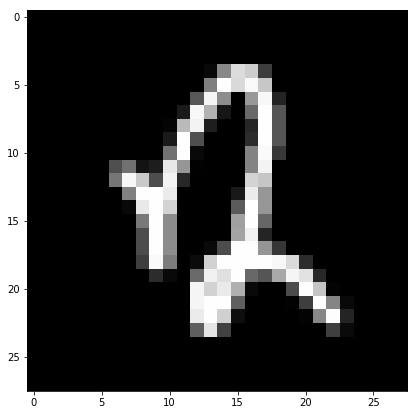

In [40]:
plt.figure(figsize=(7,7))
idx = 13471    ## Try different values

## DataFrame.as_matrix() - Convert the frame to its Numpy-array representation
pixel_matrix = X.iloc[idx].as_matrix().reshape(28, 28)   ## Reshape the image back to 28x28 pixel matrix

## plt.imshow() - Display an image on the axes.
plt.imshow(pixel_matrix, cmap = "gray")
print(y[idx])

#### StandardScaler class in sklearn.preprocessing
This class is used for performing column standardization on the dataset

In [4]:
from sklearn.preprocessing import StandardScaler
## Create an object of the class
X_std = StandardScaler().fit_transform(X)    ## fit_transform() method performs the standardization on the individual columns
X_std[:6, :]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

**Note:** Now the mean and std-dev of all the columns is 0 and 1 respectively

#### Need to import PCA class from sklearn.decomposition module
#### Always create an object of the class

In [16]:
from sklearn.decomposition import PCA
pca = PCA()

We need to mention how many principal components do we need in the **n_components** attribute of the class

In [17]:
pca.n_components = 2
pca_data = pca.fit_transform(X_std)

**Note:** fit_transform() method performs all the PCA calculations and returns the required number of principal components in a NumPy Array

In [11]:
## Quick check
pca_data[:6, :]

array([[ -5.14043554,  -5.22628883],
       [ 19.29240291,   6.03359419],
       [ -7.64455068,  -1.70594174],
       [ -0.47412562,   5.83681371],
       [ 26.55957583,   6.02481107],
       [  1.26927115,  -0.71315115]])

Convert the NumPy Array into a Pandas DataFrame so that we can use it to plot using Seaborn or Pyplot

In [12]:
df = pd.DataFrame(pca_data, columns = ('v1', 'v2'))
df.head()

,v1,v2
0,-5.140436,-5.226289
1,19.292403,6.033594
2,-7.644551,-1.705942
3,-0.474126,5.836814
4,26.559576,6.024811


We need to concatenate the species column to the DataFrame for the purpose of visualization

In [13]:
df = pd.concat([df, y], axis = 1)
df.head()

,v1,v2,label
0,-5.140436,-5.226289,1
1,19.292403,6.033594,0
2,-7.644551,-1.705942,1
3,-0.474126,5.836814,4
4,26.559576,6.024811,0


Visualizing the two principal components in MNIST

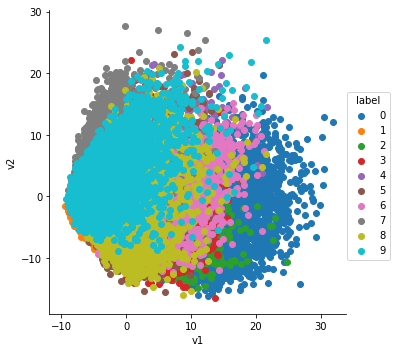

In [15]:
sns.FacetGrid(df, hue = 'label', size = 5).map(plt.scatter, 'v1', 'v2').add_legend()

## Variance Explanation
**explained\_variance\_** attribute of the PCA class gives a list of numbers which indicate how much variance is explained by each of the principal component

In [18]:
## Note: We need all the princiapl components to check variance explanation
pca.n_components = 784
pca_data = pca.fit_transform(X_std)
pca.explained_variance_

array([  4.06964787e+01,   2.91114657e+01,   2.67833371e+01,
         2.08147194e+01,   1.81000206e+01,   1.57876737e+01,
         1.38244007e+01,   1.25432643e+01,   1.10638975e+01,
         1.00889267e+01,   9.63617203e+00,   8.65579470e+00,
         8.04120472e+00,   7.88086691e+00,   7.43637560e+00,
         7.16743699e+00,   6.73538375e+00,   6.61651973e+00,
         6.42354578e+00,   6.26826675e+00,   5.93960379e+00,
         5.74928832e+00,   5.48826880e+00,   5.32649477e+00,
         5.15217038e+00,   4.94730998e+00,   4.88853571e+00,
         4.70777145e+00,   4.46528559e+00,   4.36351702e+00,
         4.32543150e+00,   4.22712324e+00,   4.08726514e+00,
         4.06176768e+00,   3.99903435e+00,   3.86804997e+00,
         3.81925839e+00,   3.71256507e+00,   3.57437538e+00,
         3.45887625e+00,   3.41436841e+00,   3.36945857e+00,
         3.25693182e+00,   3.24008824e+00,   3.18312949e+00,
         3.16286640e+00,   3.14244041e+00,   3.09287815e+00,
         3.06368054e+00,

Calculate the ratio of variance explained by each component.

In [19]:
var = pca.explained_variance_ / np.sum(pca.explained_variance_)
var

array([  5.74795336e-02,   4.11169103e-02,   3.78286715e-02,
         2.93986212e-02,   2.55643921e-02,   2.22984433e-02,
         1.95255247e-02,   1.77160531e-02,   1.56266017e-02,
         1.42495571e-02,   1.36100884e-02,   1.22254076e-02,
         1.13573634e-02,   1.11309029e-02,   1.05031053e-02,
         1.01232575e-02,   9.51302738e-03,   9.34514435e-03,
         9.07258876e-03,   8.85327331e-03,   8.38907114e-03,
         8.12027039e-03,   7.75160752e-03,   7.52311857e-03,
         7.27690355e-03,   6.98755959e-03,   6.90454706e-03,
         6.64923638e-03,   6.30675038e-03,   6.16301289e-03,
         6.10922106e-03,   5.97037089e-03,   5.77283590e-03,
         5.73682340e-03,   5.64821911e-03,   5.46321734e-03,
         5.39430432e-03,   5.24361113e-03,   5.04843259e-03,
         4.88530211e-03,   4.82243943e-03,   4.75900896e-03,
         4.60007666e-03,   4.57628685e-03,   4.49583855e-03,
         4.46721905e-03,   4.43836948e-03,   4.36836795e-03,
         4.32712937e-03,

Multiply the values by 100 to get **percentage variance explained** by each principal component

In [20]:
var *= 100
var

array([  5.74795336e+00,   4.11169103e+00,   3.78286715e+00,
         2.93986212e+00,   2.55643921e+00,   2.22984433e+00,
         1.95255247e+00,   1.77160531e+00,   1.56266017e+00,
         1.42495571e+00,   1.36100884e+00,   1.22254076e+00,
         1.13573634e+00,   1.11309029e+00,   1.05031053e+00,
         1.01232575e+00,   9.51302738e-01,   9.34514435e-01,
         9.07258876e-01,   8.85327331e-01,   8.38907114e-01,
         8.12027039e-01,   7.75160752e-01,   7.52311857e-01,
         7.27690355e-01,   6.98755959e-01,   6.90454706e-01,
         6.64923638e-01,   6.30675038e-01,   6.16301289e-01,
         6.10922106e-01,   5.97037089e-01,   5.77283590e-01,
         5.73682340e-01,   5.64821911e-01,   5.46321734e-01,
         5.39430432e-01,   5.24361113e-01,   5.04843259e-01,
         4.88530211e-01,   4.82243943e-01,   4.75900896e-01,
         4.60007666e-01,   4.57628685e-01,   4.49583855e-01,
         4.46721905e-01,   4.43836948e-01,   4.36836795e-01,
         4.32712937e-01,

Calculate the cumulative variance explained

In [21]:
var_cum = np.cumsum(var)
var_cum

array([   5.74795336,    9.85964439,   13.64251154,   16.58237366,
         19.13881288,   21.36865721,   23.32120968,   25.09281499,
         26.65547517,   28.08043088,   29.44143972,   30.66398049,
         31.79971682,   32.91280711,   33.96311764,   34.9754434 ,
         35.92674613,   36.86126057,   37.76851945,   38.65384678,
         39.49275389,   40.30478093,   41.07994168,   41.83225354,
         42.55994389,   43.25869985,   43.94915456,   44.6140782 ,
         45.24475323,   45.86105452,   46.47197663,   47.06901372,
         47.64629731,   48.21997965,   48.78480156,   49.33112329,
         49.87055373,   50.39491484,   50.8997581 ,   51.38828831,
         51.87053225,   52.34643315,   52.80644081,   53.2640695 ,
         53.71365335,   54.16037526,   54.60421221,   55.041049  ,
         55.47376194,   55.90078888,   56.32005818,   56.73223862,
         57.13469922,   57.53413326,   57.92902451,   58.31982952,
         58.69972815,   59.07218191,   59.44059491,   59.80631

#### Plot the cumulative variance

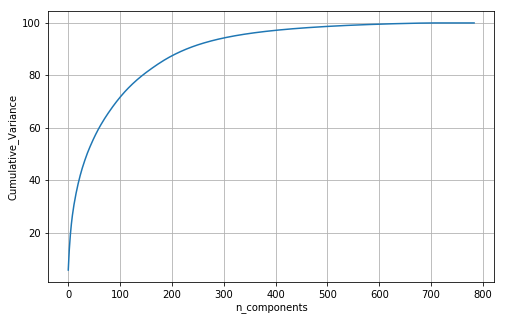

In [22]:
plt.figure(figsize = (8, 5))
plt.plot(var_cum)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_Variance')

**Observations:**
* The top 50 Principal Component explain around 60% of variance
* The top 200 Principal Components explain around 88% of variance
* The top 350 Principal Components explain around 95% of variance
* The top 500 Principal Components explain around 99% of variance

#### Note: Most of the ML algorithms take NumPy arrays as input not Pandas dataframe. Always take care about the input and output data types